In [1]:
import arcgis
from arcgis.gis import GIS
from arcgis.learn import SingleShotDetector, prepare_data

In [2]:
data = prepare_data(r"D:\BrickKilns\Training_data", 
                    batch_size=8, 
                    chip_size=384)

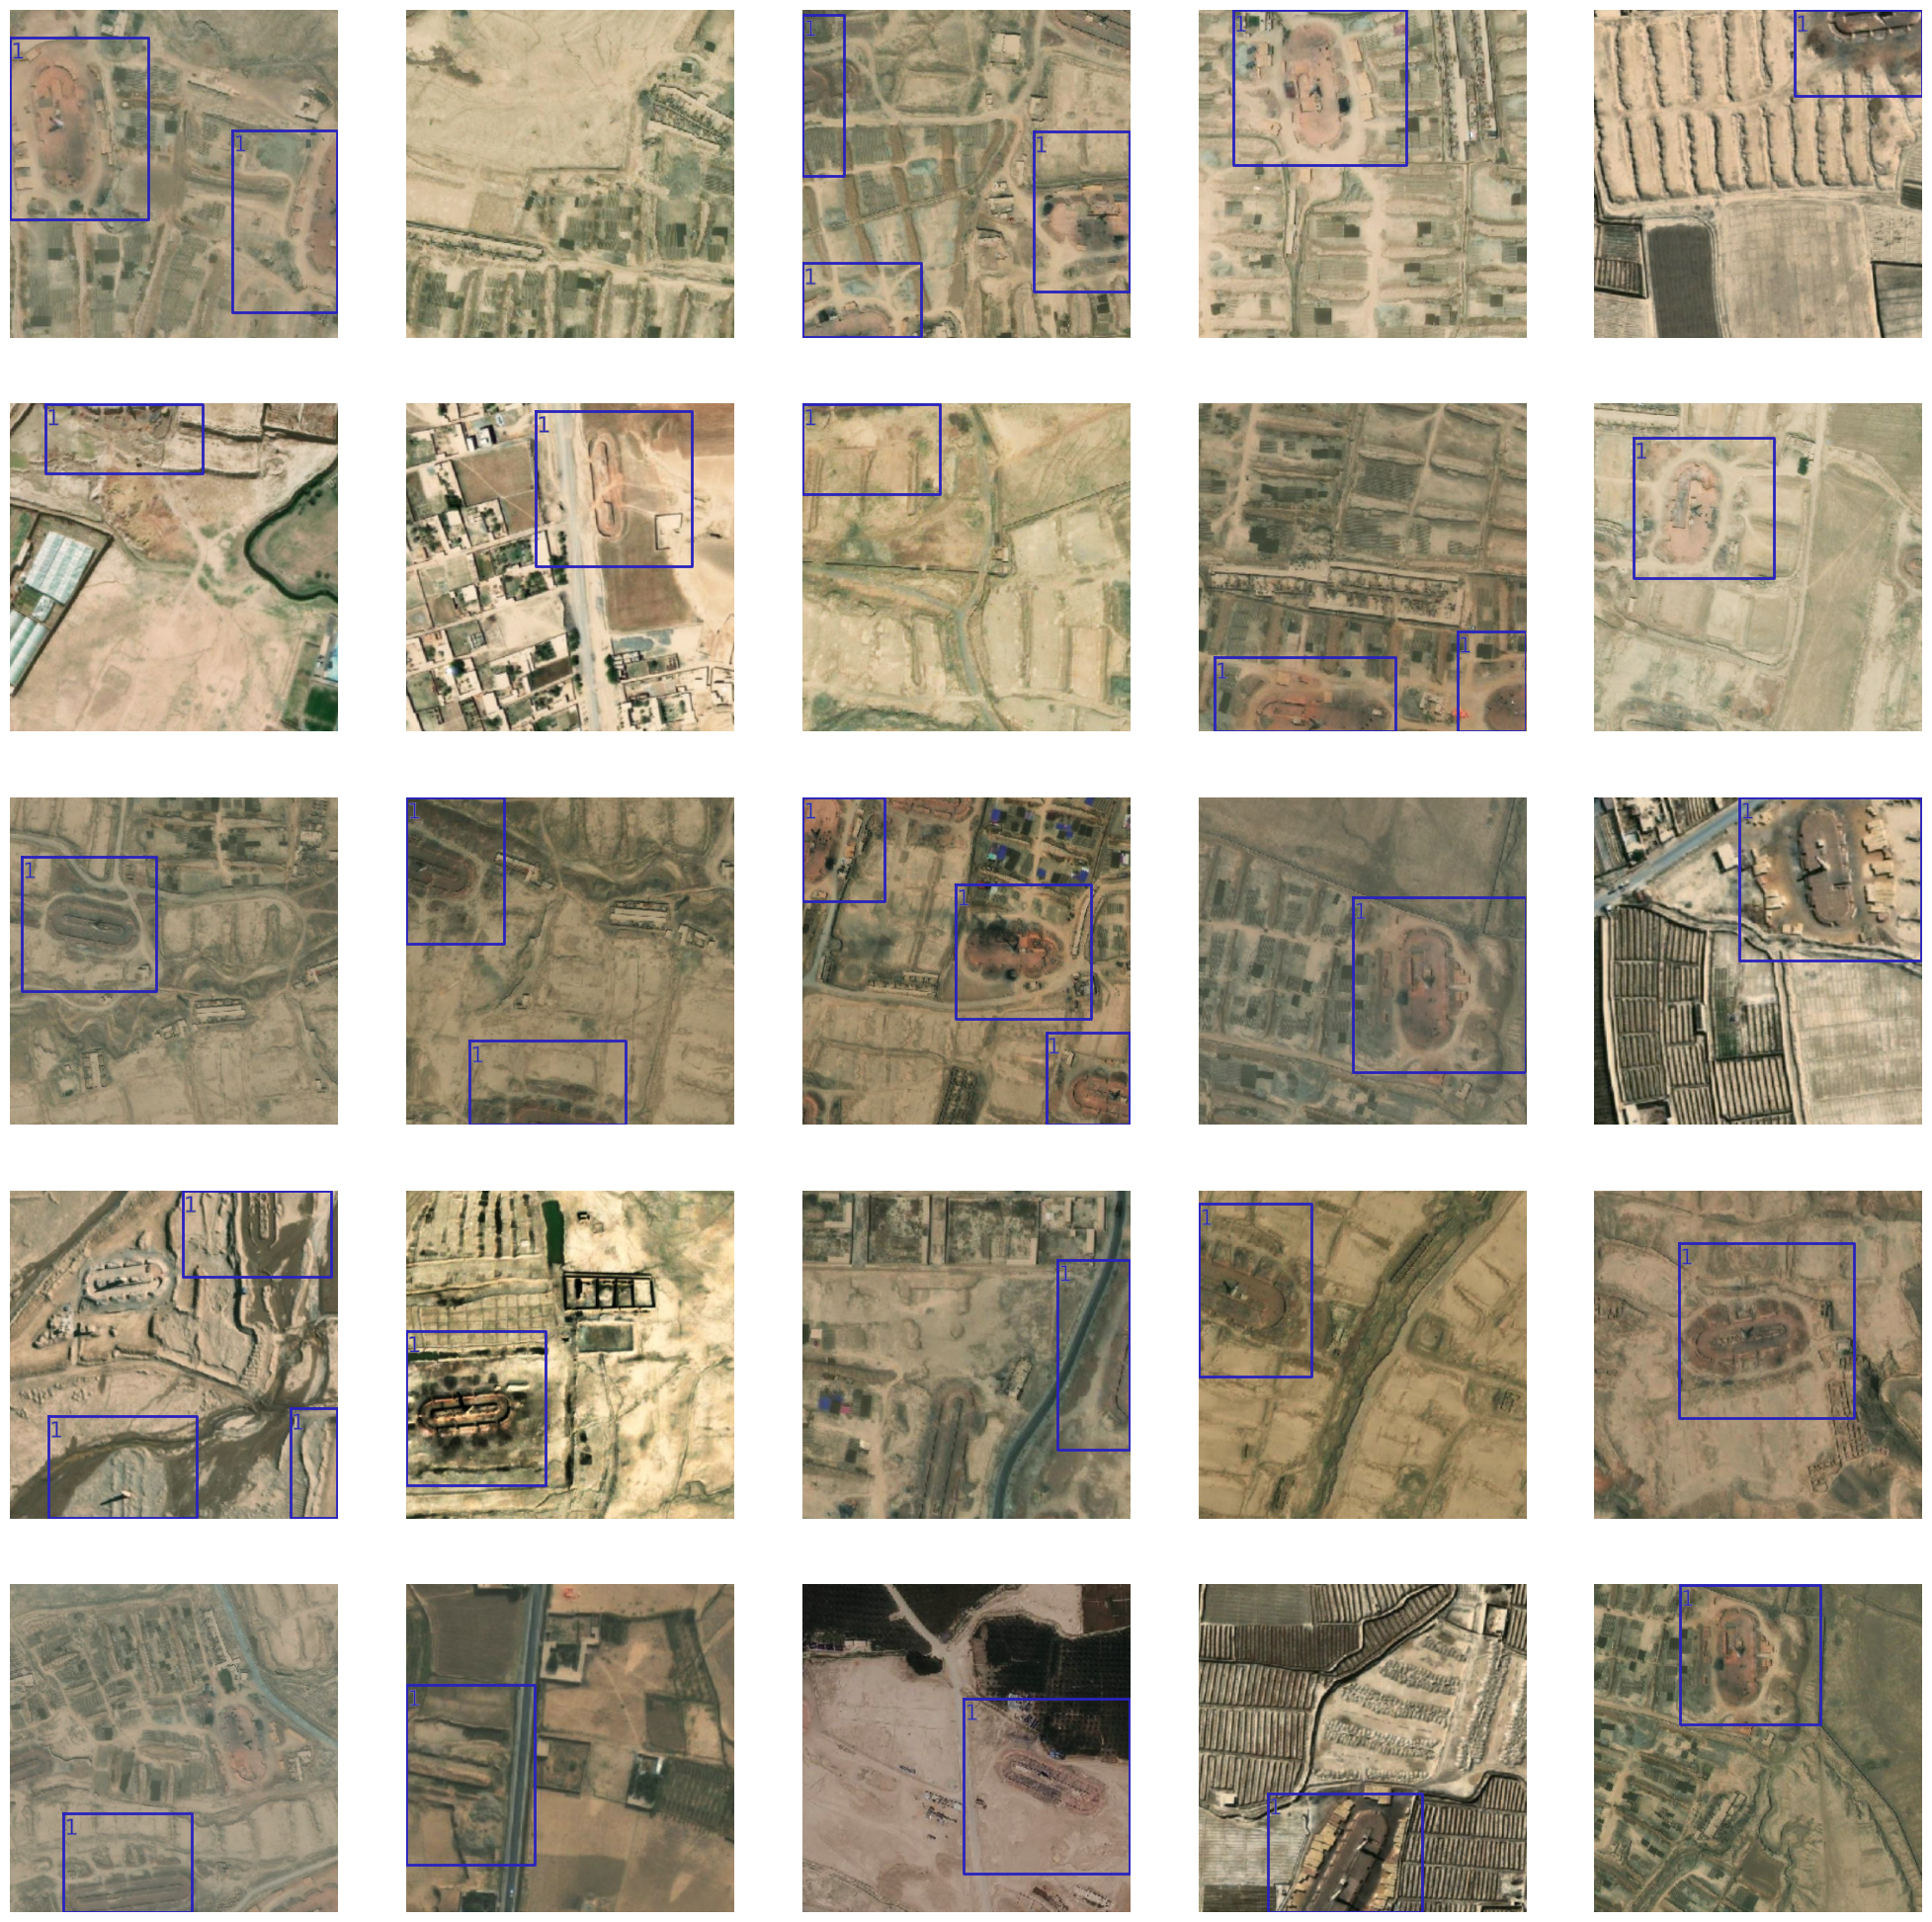

In [3]:
data.show_batch(rows=5)

In [ ]:
#model = arcgis.learn.models.UnetClassifier(data, backbone='resnet50', pointrend=True, pretrained_path = r"D:\ArcGIS Pro\PhD\Training Data and Trained Models\Pixel-based Training Datasets and Models\Mar18\models\1701_Pb_Mar18_Seq\1701_Pb_Mar18_Seq.pth")

In [11]:
model1 = SingleShotDetector(data, backbone='resnet34', pretrained_path = r"D:\BrickKilns\Pre-trained model\models\Esri_Data_Brickkilns_1\Esri_Data_Brickkilns_1.pth")

RuntimeError: Error(s) in loading state_dict for Sequential:
	Unexpected key(s) in state_dict: "1.sconvs.2.conv.weight", "1.sconvs.2.conv.bias", "1.sconvs.2.bn.weight", "1.sconvs.2.bn.bias", "1.sconvs.2.bn.running_mean", "1.sconvs.2.bn.running_var", "1.sconvs.2.bn.num_batches_tracked", "1.oconvs.1.oconv1.weight", "1.oconvs.1.oconv1.bias", "1.oconvs.1.oconv2.weight", "1.oconvs.1.oconv2.bias". 

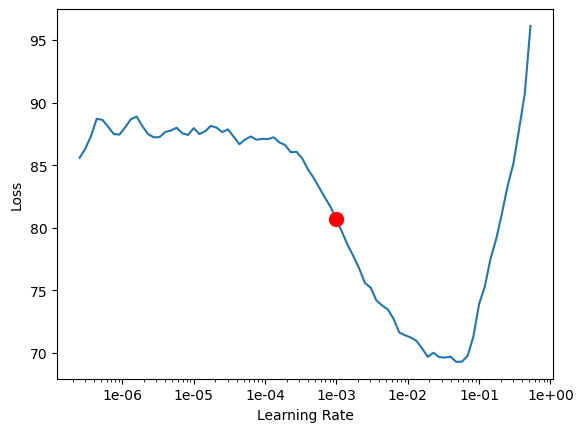

0.001

In [5]:
lr = model.lr_find()
lr

In [25]:
model.fit(40, lr=lr, early_stopping=True)

In [26]:
model.save('Esri_Data_Brickkilns_1')

Computing model metrics...


WindowsPath('D:/BrickKilns/detecting_and_categorizing_brick_kilns_from_satellite_imagery/models/Esri_Data_Brickkilns_1')

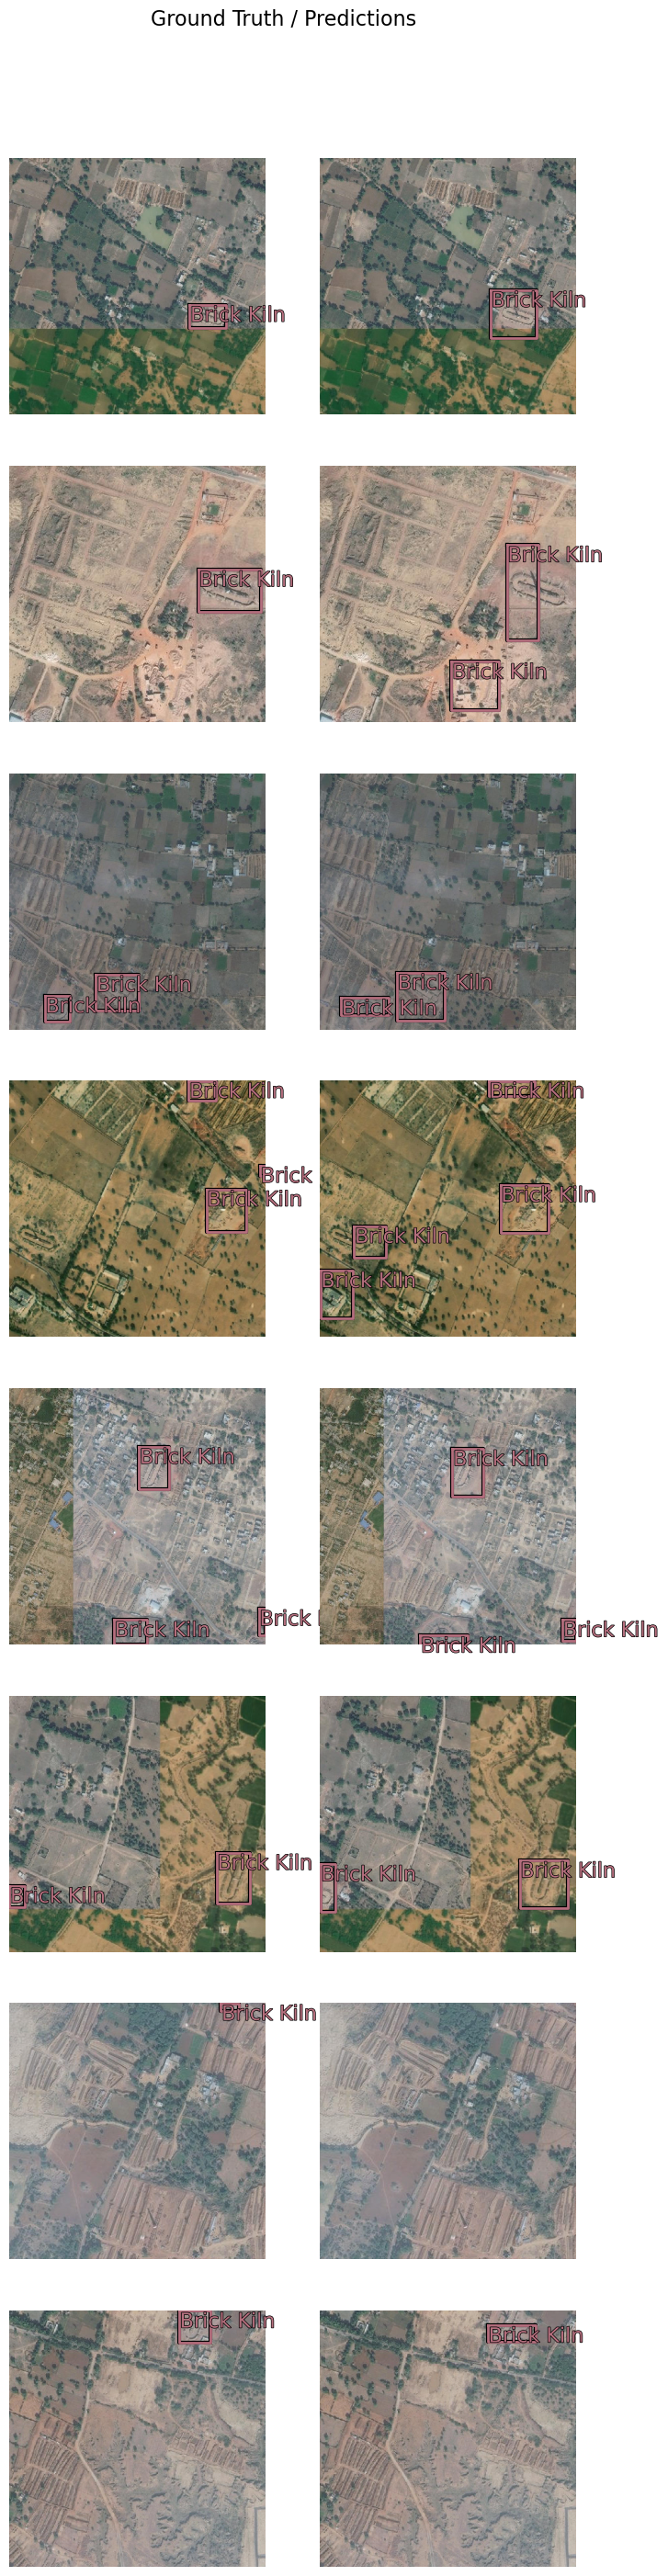

In [27]:
model.show_results(rows=8, thresh=0.2)